In [47]:
# dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

financials = "./Resources/Tesla Financials/Testla Operations Financials.csv"
stock_price = "./Resources/Tesla Stock Price/TSLAstock.xlsx"
ps_ratio = "./Resources/Tesla Stock Price/TSLApsratio.xlsx"
twitter = "./Resources/Tesla Twitter/twitter tweets.csv"

In [50]:
# set df_variable: financial statement
financials_csv = pd.read_csv(financials)
financials_df = financials_csv[["date","operating_income","cf_from_operations"]]

In [53]:
# set df_variabel: stock price
stock_price_excel = pd.read_excel(stock_price)
stock_price_df = stock_price_excel[["date","Close","Volume"]]

In [54]:
# set df_variable: price-to-sales ratio
ps_ratio_xlsx = pd.read_excel(ps_ratio)
ps_ratio_df = ps_ratio_xlsx[["date","P/S Ratio"]]

In [55]:
# set df_variable: twitter sentiment
twitter_csv = pd.read_csv(twitter)
twitter_df = twitter_csv[["date","TSLA_compound","ElonMusk_compound"]]

In [56]:
# merge: financials and stock price (AS: tesla_df_1)
tesla_df_1 = pd.merge(financials_df,stock_price_df, how="outer",on="date")

In [57]:
# merge: tesla_df_1 and ps ratio (AS: tesla_df_2)
tesla_df_2 = pd.merge(tesla_df_1,ps_ratio_df, how="outer",on="date")

In [58]:
# merge: tesla_df_2 and twitter (AS: tesla_df_3)
tesla_df_3 = pd.merge(tesla_df_2,twitter_df, how="outer",on="date")

In [59]:
# converting column: convert 'date' column to pandas.to_datetime(), THEN adding it as a new column to df
tesla_df_3["date_converted"] = pd.to_datetime(tesla_df_3["date"])

In [60]:
# sort: by date (final wrangling/applying as: tesla_df )
tesla_df = tesla_df_3.sort_values(by=["date_converted"],ascending = False)
tesla_df.head()

# use to this code: to audit via excel
# tesla_df.to_csv("tesla_df.csv",index=False,header=True)

,date,operating_income,cf_from_operations,Close,Volume,P/S Ratio,TSLA_compound,ElonMusk_compound,date_converted
623,2018-06-19,NaN,NaN,352.550000,12537147.0,5.125,0.078213,0.078213,2018-06-19
622,2018-06-18,NaN,NaN,370.829987,11985600.0,5.030,0.108785,0.108785,2018-06-18
625,2018-06-17,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-17
624,2018-06-16,NaN,NaN,NaN,NaN,NaN,0.130824,0.130824,2018-06-16
621,2018-06-15,NaN,NaN,358.170013,10848300.0,4.899,0.108785,0.108785,2018-06-15


# Notes for Reuben

In [ ]:
# adding daily return pct

tesla_df["daily_pct_change"] = tesla_df["Close"].pct_change(1)
tesla_df.head()

tesla_df.to_csv("tesla_df.csv",index=False,header=True)

In [ ]:
# tieing out to excel file

excel = pd.read_excel("tesla_df.xlsx")
test = pd.merge(tesla_df,excel,on="date",how="outer")
test[["date","daily_pct_change","pct_daily_return"]].head()

In [ ]:
test["test"] = test["daily_pct_change"] == test["pct_daily_return"]
test["test"]

# End Note

# Graph Section

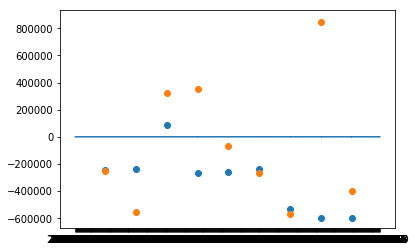

In [62]:
# Financials

# plot - scatter: operating income
plt.scatter(tesla_df["date"],
            tesla_df["operating_income"])
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - scatter: cash flows
plt.scatter(tesla_df["date"],
            tesla_df["cf_from_operations"])
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - line: close stock prices
plt.plot(tesla_df["date"],
         tesla_df["Close"])

plt.show()

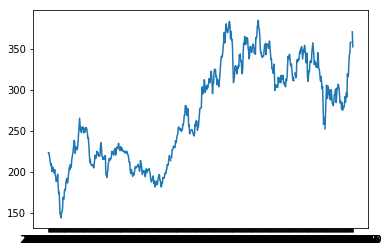

In [63]:
# plot - line: close stock prices
plt.plot(tesla_df["date"],
         tesla_df["Close"])

plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


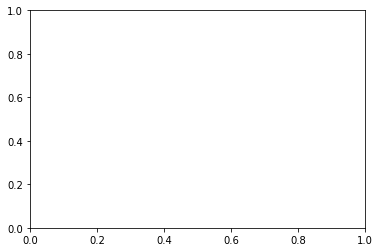

In [87]:
fig, ax1 = plt.subplots()
print(ax1)

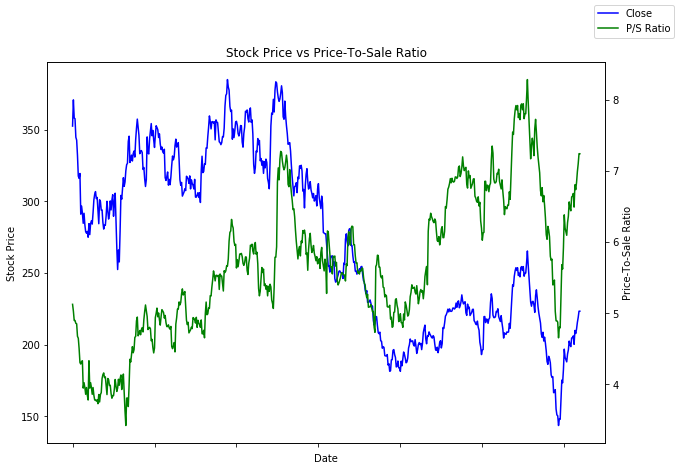

In [109]:
# plot - Stock Price vs PS ratio

andy_df = tesla_df[["date","Close","P/S Ratio"]].dropna(how="any")

plt.figure(figsize=(900,6))

ax = andy_df.plot(x="date",
                  y="Close",
                  legend=False,
                  color="blue")

ax2 = ax.twinx()

andy_df.plot(x="date",
             y="P/S Ratio",
             ax=ax2,
             legend=False,
             color="Green",
             figsize=(10,7))

ax.figure.legend()

plt.title("Stock Price vs Price-To-Sale Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax2.set_ylabel("Price-To-Sale Ratio")

plt.savefig("Stock Price vs Price-To_Sale Ratio.png")

In [ ]:
# plot - Financials vs PS ratio

andy_df = tesla_df[["date","Close","P/S Ratio"]].dropna(how="any")

plt.figure(figsize=(900,6))

ax = andy_df.plot(x="date",
                  y="Close",
                legend=True,
                 color="blue")

ax2 = ax.twinx()

andy_df.plot(x="date",
            y="P/S Ratio",
            ax=ax2,
            legend=True,
            color="Green")
plt.show()

In [65]:
# plot - Financials vs PS ratio